# Pre-Processing Data

# Data Cleaning
https://www.kaggle.com/learn/data-cleaning


In [4]:
# download dataset
# pip install kagglehub
import kagglehub

# Download latest version
#path = kagglehub.dataset_download("maxhorowitz/nflplaybyplay2009to2016")

#print("Path to dataset files:", path)
path = r'C:\Users\samfi\.cache\kagglehub\datasets\maxhorowitz\nflplaybyplay2009to2016\versions\6'

In [5]:
# load data
import pandas as pd
import numpy as np

nfl_data = pd.read_csv(path + '/NFL Play by Play 2009-2017 (v4).csv')
np.random.seed(0) # for future random values

C:\Users\samfi\AppData\Local\Temp\ipykernel_33580\4049689394.py:5: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv(path + '/NFL Play by Play 2009-2017 (v4).csv')


## 1. View Data
Check if data is read correctly and check for any obvious data issues

In [10]:
nfl_data.head()
nfl_data.sample(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
142828,2012-09-24,2012092400,3,1,1.0,09:25,10,3265.0,39.0,SEA,...,1.379042,0.522390,0.477610,0.562151,0.437849,0.522390,0.039762,-0.002897,0.042659,2012
69534,2010-11-14,2010111408,15,3,2.0,05:37,6,1237.0,46.0,NYG,...,NaN,0.053894,0.946106,0.085723,0.914277,0.053894,0.031830,NaN,NaN,2010
372672,2017-10-01,2017100111,1,1,2.0,14:23,15,3563.0,37.0,NYG,...,NaN,0.524307,0.475693,0.578703,0.421297,0.475693,-0.054396,NaN,NaN,2017
290484,2015-11-01,2015110107,18,3,NaN,15:00,15,1800.0,0.0,SF,...,NaN,0.893864,0.106136,0.889745,0.110255,0.893864,-0.004119,NaN,NaN,2015
206636,2013-11-17,2013111707,15,2,4.0,00:07,1,1807.0,5.0,PIT,...,NaN,0.260880,0.739120,0.279439,0.720561,0.739120,-0.018559,NaN,NaN,2013
399295,2017-12-14,2017121400,6,2,3.0,07:17,8,2237.0,41.0,DEN,...,NaN,0.808998,0.191002,0.786334,0.213666,0.808998,-0.022663,NaN,NaN,2017
181400,2013-09-08,2013090803,22,4,2.0,06:44,7,404.0,0.0,CLE,...,0.248509,0.118991,0.881009,0.103870,0.896130,0.118991,-0.015121,-0.015604,0.000484,2013
182573,2013-09-09,2013090901,7,2,1.0,10:09,11,2409.0,45.0,SD,...,NaN,0.622705,0.377295,0.621185,0.378815,0.377295,0.001520,NaN,NaN,2013
259043,2014-11-30,2014113011,13,3,1.0,07:23,8,1343.0,6.0,KC,...,-4.265326,0.155025,0.844975,0.098740,0.901260,0.155025,-0.056285,0.001324,-0.057609,2014
301401,2015-11-29,2015112906,4,1,3.0,04:07,5,2947.0,4.0,SD,...,NaN,0.725765,0.274235,0.768200,0.231800,0.274235,-0.042435,NaN,NaN,2015


## 2. Missing Values
Check for NaN values above

In [17]:
# when there are NaN values, find how many missing data points we have in each column:
missing_value_count = nfl_data.isnull().sum() #per column isna is the same as isnull
missing_value_count[:10]

Date                0
GameID              0
Drive               0
qtr                 0
down            61154
time              224
TimeUnder           0
TimeSecs          224
PlayTimeDiff      444
SideofField       528
dtype: int64

In [22]:
# Percentage of values that are missing to see scale of problem:
total_cells = np.prod(nfl_data.shape)
total_missing = missing_value_count.sum()

# percent of data that is missing
percent_missing = total_missing/total_cells *100
print(percent_missing)

27.66722370547874


## 2a Why is it missing data?
Use 'data intuition' to work out why there are Nans

> Is this value missing because it wasn't recorded or because it doesn't exist?

**Doesn't exist:** keep as Nan  
**Was not recorded:** imputation
> **Imputation:** guess value based on other values in the column and row

**Example not recorded:**
- TimeSecs column in the data  
- Documentation: number of seconds left in the game when the play was made. 
- Try imputation.

**Example doesn't exist:**
- PenalizedTeam column in the data  
- Documentation: if no penalty in the play, then this will be Nan. 
- Leave as NaN or add a third value like 'neither'

## 2b: Two Options:

### Drop Missing Values
#### Drop Rows

In [23]:
# Drop rows containing any Nan value
nfl_data.dropna()
# Every row has a nan value here, so is not optimal as all data removed

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


#### Drop Columns

In [25]:
columns_after_na_dropped = nfl_data.dropna(axis=1)
columns_after_na_dropped.head()

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [29]:
print(f'Previous total columns: {nfl_data.shape[1]}')
print(f'Total columns after na dropped: {columns_after_na_dropped.shape[1]}')
print('We have lost a lot of data but all na values have been dropped')

Previous total columns: 102
Total columns after na dropped: 37
We have lost a lot of data but all na values have been dropped


### Fill in Missing Values Automatically
#### Fill with specified value:

In [31]:
# small subset for visualising
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [32]:
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Or, fill values with whatever comes next in the column (if rows have logical order to them)

In [33]:
# bfill=backfill: replace all NA's with the next non-null value below it in the same column, axis=0 is filling down columns 
# then replace all the remaining na's with 0 (e.g. bottom of column)
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

C:\Users\samfi\AppData\Local\Temp\ipykernel_26248\3049679174.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


# 3. Scaling and Normalisation

In [6]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling
# or 
from sklearn.preprocessing import MinMaxScaler

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# set seed for reproducibility
np.random.seed(0)

## Scaling vs Normalisation
Both cases you are transforming numeric data.
> **Scaling:** changing the range of data  
> **Normalisation:** changing the shape of the distribution of the data

**Rule of Thumb:** Aim for column ranges [-1,1]. Scale/ normalise if not

## Scaling:
Data fits within a specific scale, e.g. 0-100 or 0-1.   
**When to use:** measuring how far apart data points are (e.g. comparing currencies)

## Min Max Scaling:
$$
X_{\text{scaled}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}
$$

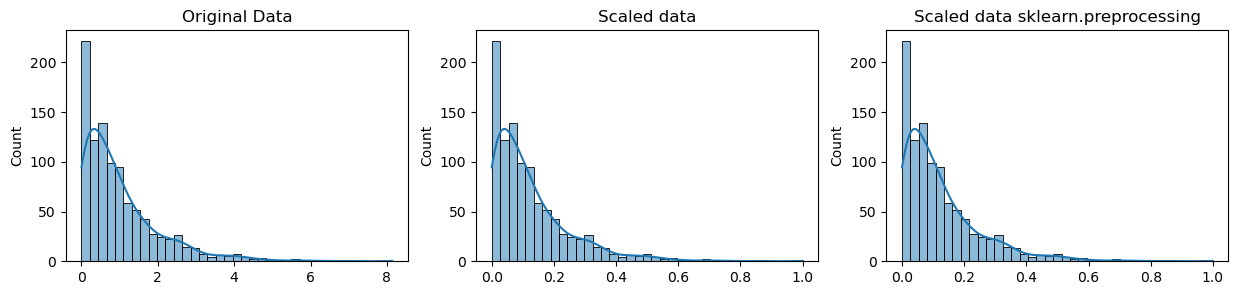

In [14]:
# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size=1000)
original_data_df = pd.DataFrame(original_data, columns=[0])
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(original_data, columns=[0])

#or
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(original_data_df), columns=[0])

# plot both together to compare
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
sns.histplot(df_scaled, ax=ax[2], kde=True, legend=False)
ax[2].set_title("Scaled data sklearn.preprocessing")
plt.show()

## Normalisation:
Make the data be described as a normal distribution.   
**When to use:** ML technique that used normal distribution.

$$
X_{\text{scaled}} = \frac{X - \mu}{\sigma}
$$

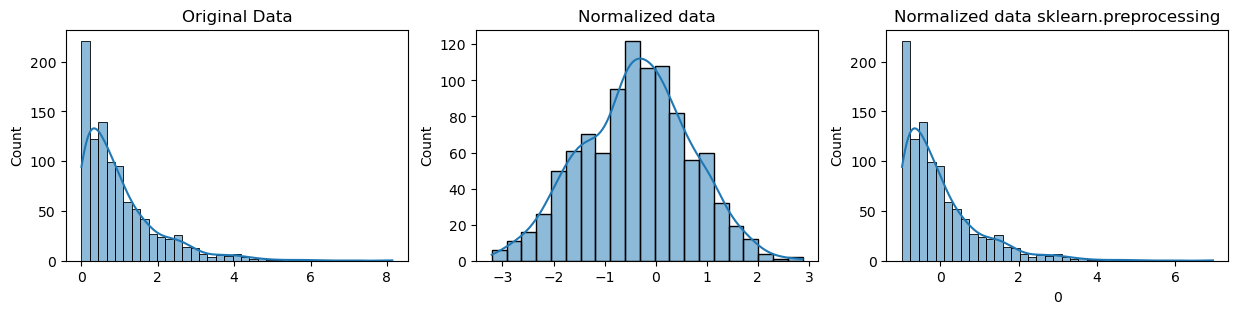

In [30]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)
# makes it symmetrical like Gaussian
#or
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
original_data_df = pd.DataFrame(original_data, columns=[0])
df_scaled_normal = pd.DataFrame(scaler.fit_transform(original_data_df), columns=original_data_df.columns)
# Note: it is normal but doesnt look like it as data is skewed originally


# plot both together to compare
fig, ax=plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
sns.histplot(df_scaled_normal[0], ax=ax[2], kde=True, legend=False)
ax[2].set_title("Normalized data sklearn.preprocessing")
plt.show()

# 4. Parsing Dates

In [35]:
import datetime

landslides = pd.read_csv(r'C:\Users\samfi\Documents\cloned_reps\Data-Scientist-Learning\Preprocessing_data\data\catalog.csv')

# set seed for reproducibility
np.random.seed(0)
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [36]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


We see above the dtype is object (various types)

In [38]:
landslides['date'].dtype # O=object

dtype('O')

## Parsing Dates pd.to_datetime
> **Parsing Dates:** convert string to date

### strftime
Here, we specify which parts of the date are where in the date column.  
- %d: day
- %m: month
- %y: year two-digit
- %Y: year four-digit

Example above: 3/22/07: %m/%d/%y

In [43]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format='%m/%d/%y')
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

**NOTE:** Multiple date formats:
- You can use the parameter:
    - pd.to_datetime(landslides['date'], infer_datetime_format=True)
- We don't always use this as it may not be correct and it is slow

## Select the Day

In [46]:
day_landslide = landslides['date_parsed'].dt.day
day_landslide.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

## Select the Month

In [47]:
month_landslide = landslides['date_parsed'].dt.month
month_landslide.head()

0    3.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: date_parsed, dtype: float64